<a href="https://colab.research.google.com/github/brecinosm/PROYECTO/blob/main/Redes_neuronales_convolucionales_Escribir_N%C3%BAmeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
#Se simplifica para poder usar el modulo de aumento de datos
#de Keras de esta manera
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

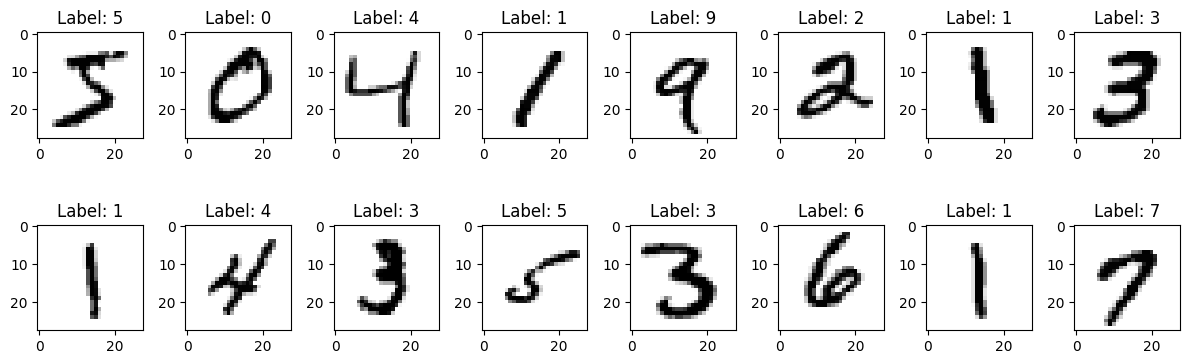

In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros que se cargaron del set de datos
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [ ]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25

#rango_inclinacion=15 #No uso, pero serviria para poder darle la inclinacion para reconocer mas numeros.

rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #Este se une a la variable que no se utiliza al inicio de esta porcion de codigo.
)

datagen.fit(X_entrenamiento)

ANTES:



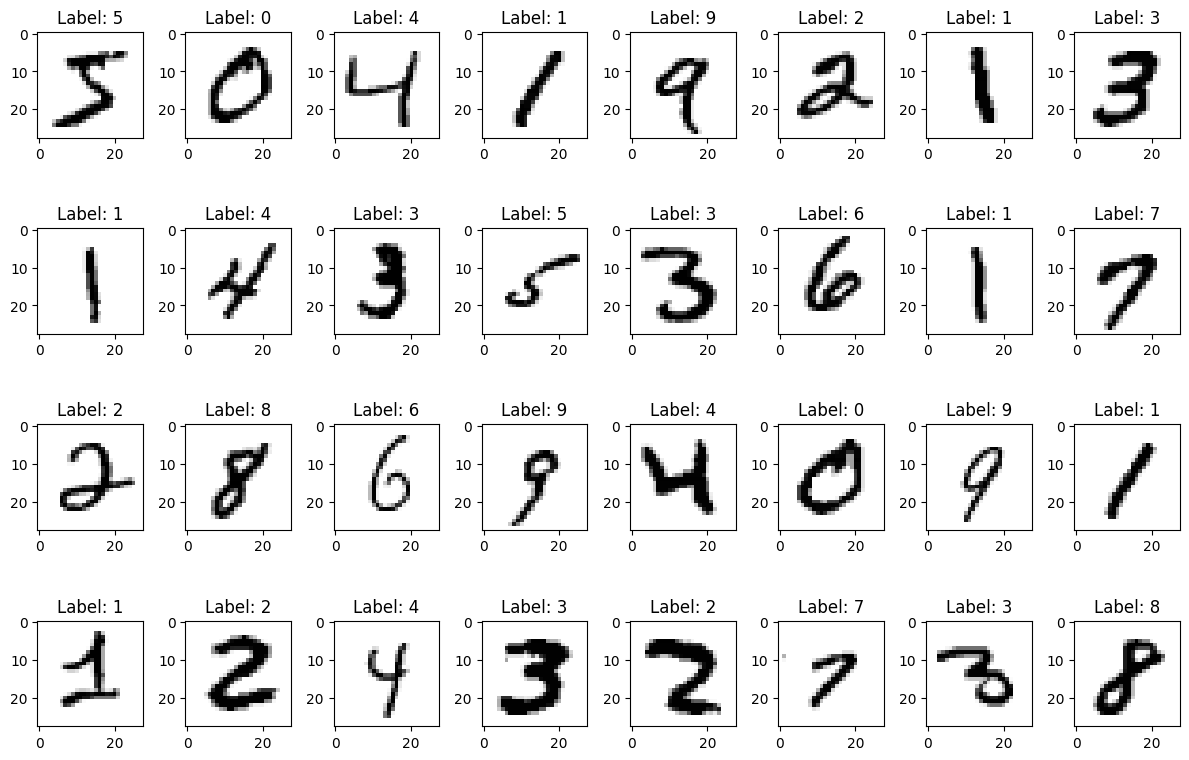

DESPUES:



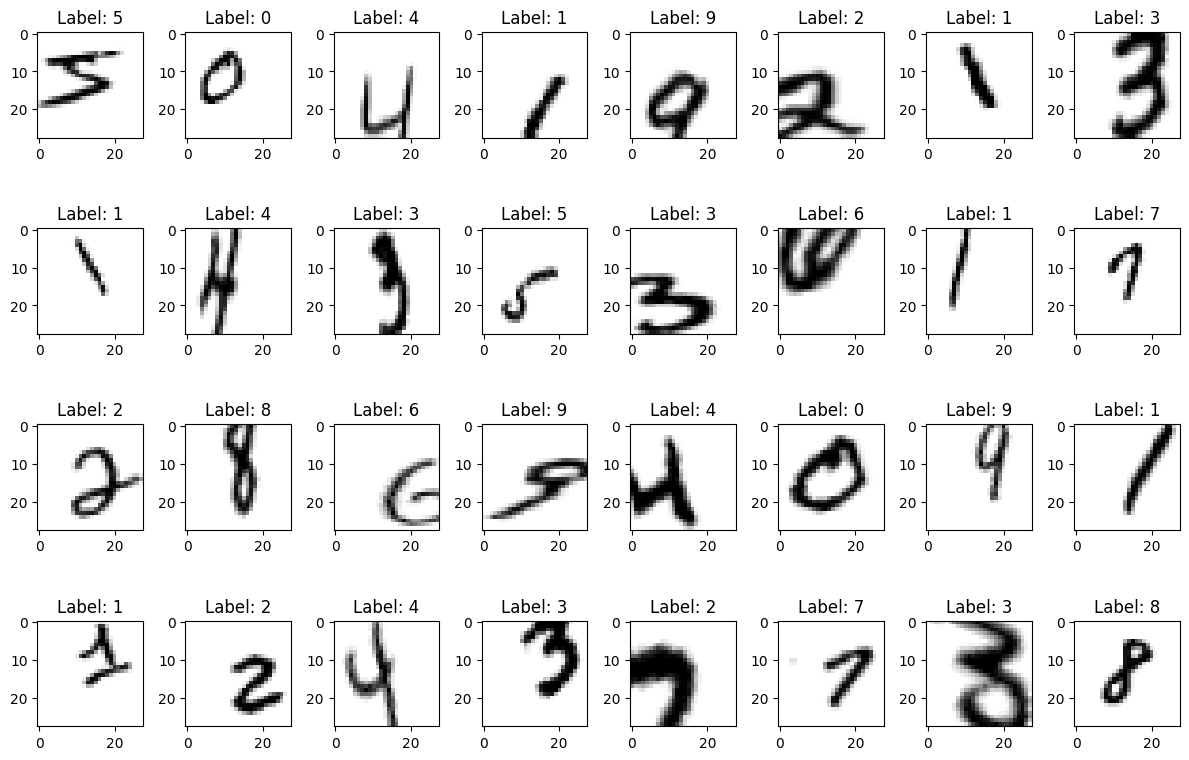

In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime como se ven antes y despues de las transformaciones o del entrenamiento
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [ ]:
#Modelo, se empieza a configurar el modelo
# Crear un modelo secuencial
modelo = tf.keras.models.Sequential([

    # Primera capa convolucional con 32 filtros de 3x3, función de activación ReLU y forma de entrada 28x28x1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Primera capa de max-pooling con tamaño de ventana 2x2
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional con 64 filtros de 3x3 y función de activación ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Segunda capa de max-pooling con tamaño de ventana 2x2
    tf.keras.layers.MaxPooling2D(2, 2),

    # Capa de dropout con una tasa de abandono (dropout rate) de 0.5 para prevenir sobreajuste
    tf.keras.layers.Dropout(0.5),
    # Aplanar la salida de las capas convolucionales para pasar a la capa densa
    tf.keras.layers.Flatten(),
    # Capa densa (totalmente conectada) con 100 unidades y función de activación ReLU
    tf.keras.layers.Dense(100, activation='relu'),
    # Capa de salida densa con 10 unidades (una por cada clase) y función de activación softmax
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos antes
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [ ]:
TAMANO_LOTE = 32

#Entrenar la red neuronal lleva tiempo ya que aumentamos el set de datos con las transformaciones.

print("Entrenando modelo...");

# Número de épocas para entrenar el modelo
epocas = 60

# Entrenar el modelo utilizando el generador de datos de entrenamiento
history = modelo.fit(
    data_gen_entrenamiento,             # Generador de datos de entrenamiento
    epochs=epocas,                      # Número de épocas
    batch_size=TAMANO_LOTE,             # Tamaño del lote (batch size)
    validation_data=(X_pruebas, Y_pruebas),  # Datos de validación (características y etiquetas)
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),  # Número de pasos por época
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))  # Número de pasos de validación por época
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 31s 14ms/step - loss: 1.1875 - accuracy: 0.6013 - val_loss: 0.1866 - val_accuracy: 0.9543
Epoch 2/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7009 - accuracy: 0.7731 - val_loss: 0.1014 - val_accuracy: 0.9709
Epoch 3/60
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5939 - accuracy: 0.8099 - val_loss: 0.1197 - val_accuracy: 0.9652
Epoch 4/60
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5312 - accuracy: 0.8288 - val_loss: 0.1116 - val_accuracy: 0.9678
Epoch 5/60
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4908 - accuracy: 0.8416 - val_loss: 0.0897 - val_accuracy: 0.9738
Epoch 6/60
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4632 - accuracy: 0.8503 - val_loss: 0.1117 - val_accuracy: 0.9625
Epoch 7/60
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4453 - accuracy: 0.8561

In [ ]:
#Exportar el modelo ya entrenado al explorador
modelo.save('numeros_conv_ad_do.h5')

#se instala tensorflow.js para usarlo posteriormente
!pip install tensorflowjs

#Se crea una carpeta
!mkdir carpeta_salida

#Convertirlo a tensorflow.js (indicando el nombre asinado arriba, en esta porcion de codigo.)
!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida

NameError: name 'modelo' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')